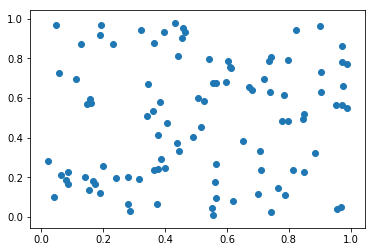

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

url = 'https://raw.githubusercontent.com/choct155/telling_stories_with_data/master/assignments/data/hw1_test_data.csv'
df = pd.read_csv(url,index_col=0)

x = df['x']
y = df['y']

mp.scatter(x,y)
mp.show()

Populating the interactive namespace from numpy and matplotlib


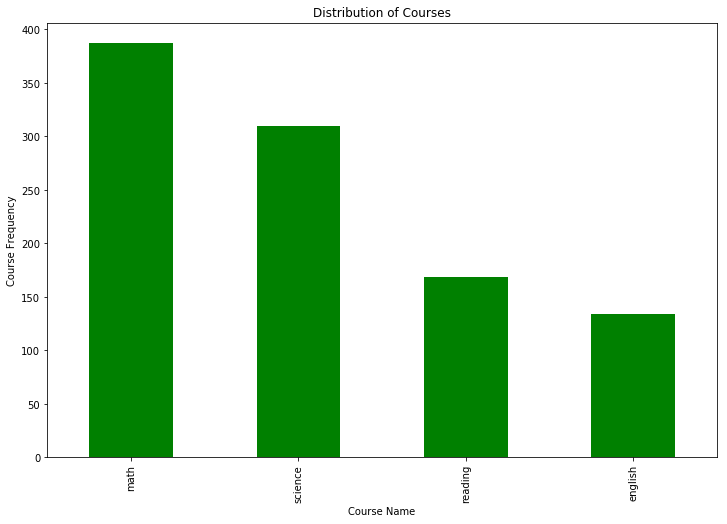

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp

# Enable
%pylab inline

n = 1000
courses  = ['math', 'science', 'english', 'reading']
course_weights = [0.4, 0.3, 0.13, 0.17]

course_rankings = np.random.choice(courses, size = n, p=course_weights)

fig, ax = mp.subplots(figsize=(12,8))
pd.Series(course_rankings).value_counts().plot(kind='bar', ax=ax, color='g')
ax.set_title('Distribution of Courses')
ax.set_xlabel('Course Name')
ax.set_ylabel('Course Frequency')

Enter Registration Key: ········
  footnotes period periodName   value  year
0      [{}]    A01     Annual  86.244  1996
1      [{}]    A01     Annual  84.713  1995
2      [{}]    A01     Annual  85.141  1994
3      [{}]    A01     Annual  84.688  1993
4      [{}]    A01     Annual  85.037  1992
5      [{}]    A01     Annual  82.280  1991
6      [{}]    A01     Annual  82.625  1990
7      [{}]    A01     Annual  81.965  1989
8      [{}]    A01     Annual  81.587  1988
9      [{}]    A01     Annual  80.816  1987


<function matplotlib.pyplot.show>

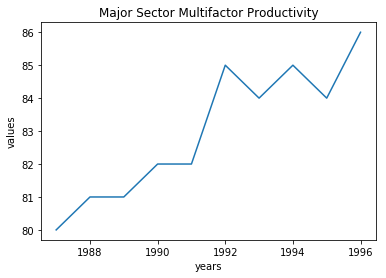

In [106]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as mp
from IPython.display import HTML
import getpass
import requests

def frame(url, height=400, width=100):
    display_string = '<frame src={url} width={w} height={h}></iframe>'.format(url=url, w=width, h=height)
    return HTML(display_string)

frame('https://data.bls.gov/registrationEngine/')
registration_key = getpass.getpass('Enter Registration Key: ')

series = 'MPU4900012'

frame('https://api.bls.gov/publicAPI/v1/timeseries/data/')

def capture_series(series, start, end, key=registration_key):
    url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
    url += '?registrationkey={key}'.format(key=key)
    data = json.dumps({
        "seriesid": [series],
        "startyear": str(start),
        "endyear": str(end)
    })
    
    headers = {
        "Content-type": "application/json"
    }

    result = requests.post(url, data=data, headers=headers)
    return json.loads(result.text)

json_data = capture_series(series, 1987, 2016)

json_data

df_data = pd.DataFrame(json_data['Results']['series'][0]['data'])
print(df_data)

df_sub = df_data[['value', 'year']].astype(float).astype(int)
df_sub.set_index('year', inplace=True)
df_sub.sort_index(inplace=True)
df_sub

x = df_sub.index
y = df_sub['value']

mp.plot(x,y)
mp.title('Major Sector Multifactor Productivity')
mp.xlabel('years')
mp.ylabel('values')
mp.show
